In [2]:
import math
import os
import copy
import time
import warnings
import torch

from tempfile import TemporaryDirectory
from typing import Tuple
from typing import List
from typing import Optional, Tuple
from typing import Optional, Any, Union, Callable

from torch import nn, Tensor
from torch.nn import functional as F
from torch.utils.data import dataset
from transformers import PreTrainedModel
from torch.nn.modules.linear import NonDynamicallyQuantizableLinear
from torch.nn.init import constant_, xavier_normal_, xavier_uniform_
from torch.nn.parameter import Parameter
from torch.nn.modules.module import Module
from torch.nn.modules.container import ModuleList
from torch.nn.modules.dropout import Dropout
from torch.nn.modules.linear import Linear
from torch.nn.modules.normalization import LayerNorm
from torchtext.datasets import WikiText2
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

from transformers import PretrainedConfig
from transformers import OpenAIGPTConfig, AutoTokenizer, OpenAIGPTLMHeadModel 

from datasets import load_dataset
import matplotlib.pyplot as plt
import common_utils

import torch.optim as optim

import torch

In [2]:
root = "/private/home/yuandong/luckmatters/ssl/real-dataset"
# model = "model0499_train1.00_loss0.0039_test1.00_loss0.0085.pt"
model = "model0499_train1.00_loss0.0226_test1.00_loss0.0347.pt"
model = "model0999_train1.00_loss0.0063_test1.00_loss0.0123.pt"
model = "model0999_train1.00_loss0.0062_test1.00_loss0.0109.pt"
model = "model0999_train1.00_loss0.0018_test1.00_loss0.0040.pt"
model = "model0999_train1.00_loss0.0312_test1.00_loss0.3007.pt"
model = "model0999_train1.00_loss0.0237_test1.00_loss0.1124.pt"
model = "model0999_train1.00_loss0.0058_test1.00_loss0.1403.pt"
model = "model4999_train1.00_loss0.0046_test1.00_loss0.0534.pt"
model = "model19999_train1.00_loss0.0010_test1.00_loss0.0011.pt"
model = "model19999_train1.00_loss0.0001_test1.00_loss0.0023.pt"
model = "model19999_train1.00_loss0.0010_test1.00_loss0.0412.pt"
model = "model19999_train1.00_loss0.0389_test1.00_loss0.1165.pt"
model = "model04999_train1.00_loss0.0002_test1.00_loss0.0010.pt"
model = "model04999_train1.00_loss0.0068_test1.00_loss0.0133.pt"
model = "model01999_train1.00_loss0.0195_test1.00_loss0.0274.pt"
model = "model01999_train1.00_loss0.0161_test1.00_loss0.0229.pt"

model = "model01999_train1.00_loss0.0018_test1.00_loss0.0044.pt"
model = "model01999_train1.00_loss0.0005_test1.00_loss0.0059.pt"
model = "model01999_train1.00_loss0.0000_test1.00_loss0.0004.pt"

model = "model01999_train1.00_loss0.0000_test1.00_loss0.0032.pt"
model = "model01999_train1.00_loss0.0000_test1.00_loss0.0008.pt"
model = "model01999_train1.00_loss0.0000_test1.00_loss0.0002.pt"
model = "model01999_train1.00_loss0.0001_test1.00_loss0.0123.pt"

model = "model04999_train1.00_loss0.0000_test1.00_loss0.0000.pt"

model = "model04999_train1.00_loss0.0000_test1.00_loss0.0002.pt"

model = "model04999_train1.00_loss0.0001_test1.00_loss0.0001.pt"

model = "model04999_train1.00_loss0.0002_test1.00_loss0.0037.pt"

model = "model04999_train1.00_loss0.0003_test1.00_loss0.0025.pt"

data = torch.load(os.path.join(root, model))

FileNotFoundError: [Errno 2] No such file or directory: '/private/home/yuandong/luckmatters/ssl/real-dataset/model04999_train1.00_loss0.0003_test1.00_loss0.0025.pt'

In [2]:
import pandas as pd

df = pd.DataFrame(data["results"])

NameError: name 'data' is not defined

In [76]:
df

,epoch,train_acc,test_acc,train_loss,test_loss
0,99,1.0,0.0,0.000067,1.239753
1,199,1.0,0.0,0.000026,1.123643
2,299,1.0,0.0,0.000021,0.991086
3,399,1.0,0.0,0.000017,0.843499
4,499,1.0,1.0,0.000014,0.688384
5,599,1.0,1.0,0.000011,0.535435
6,699,1.0,1.0,0.000008,0.395140
7,799,1.0,1.0,0.000007,0.275867
8,899,1.0,1.0,0.000005,0.182077
9,999,1.0,1.0,0.000004,0.114092


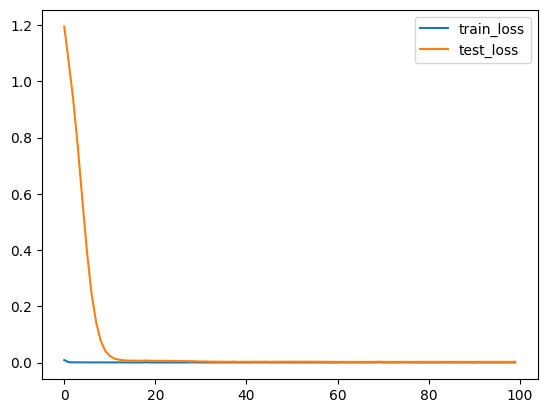

In [251]:
plt.plot(df["train_loss"], label="train_loss")
plt.plot(df["test_loss"], label="test_loss")

plt.legend()

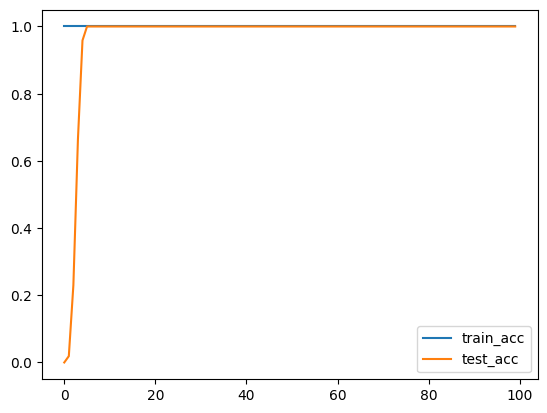

In [252]:
plt.plot(df["train_acc"], label="train_acc")
plt.plot(df["test_acc"], label="test_acc")

plt.legend()

In [253]:
model = data["model"]

In [355]:
model.keys()

odict_keys(['embedding.weight', 'layera.weight', 'layerb.weight', 'layerc.weight'])

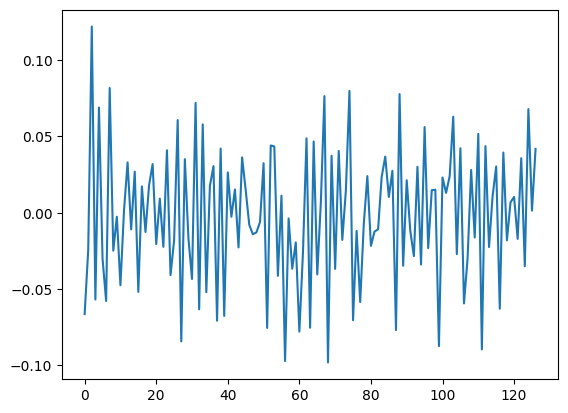

In [158]:
plt.plot(model["layera.weight"][24,:].cpu())

In [346]:
model["layera.weight"].size()

torch.Size([512, 127])

In [254]:
# compute fourier transform in 
d = model["layera.weight"].shape[1]
print(d)

v = torch.ones(d, dtype=torch.cfloat)
# unit 
for i in range(d):
    v[i].real = math.cos(2 * math.pi * i / d)
    v[i].imag = math.sin(2 * math.pi * i / d)
    
fourierBases = torch.zeros(d, d, dtype=torch.cfloat, requires_grad=False)
for i in range(d):
    fourierBases[:,i] = v ** i

23


In [255]:
A = model["layera.weight"].cfloat().cpu() @ fourierBases.conj() / d
B = model["layerb.weight"].cfloat().cpu() @ fourierBases.conj() / d
C = model["layerc.weight"].cfloat().cpu().t() @ fourierBases / d

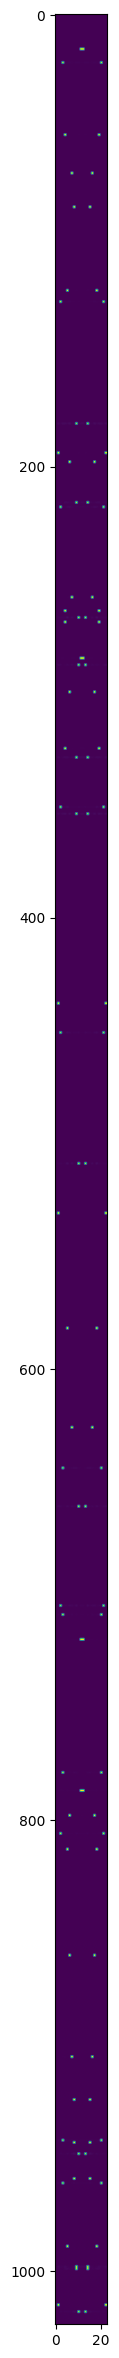

In [256]:
plt.figure(figsize=(30,30))
plt.imshow(A.abs())

In [118]:
126/2 * 6

378.0

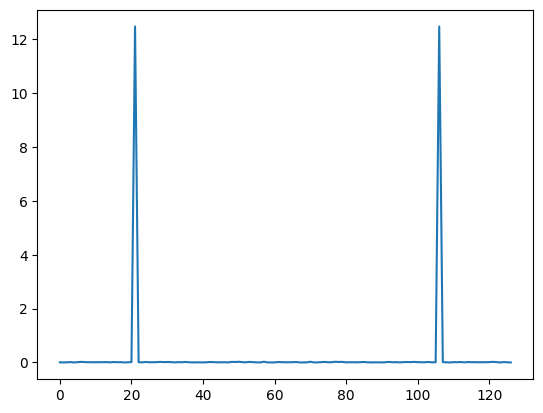

In [272]:
Athres = A.abs() > 0.1
Athres.sum(dim=0)

tensor([0, 4, 6, 6, 4, 4, 4, 4, 4, 6, 6, 4, 4, 6, 6, 4, 4, 4, 4, 4, 6, 6, 4])

tensor([198, 300, 798, 860])


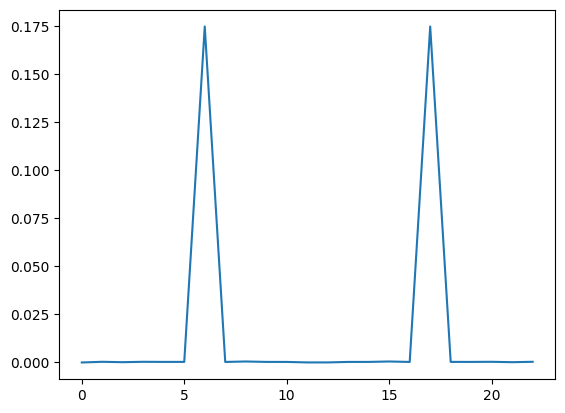

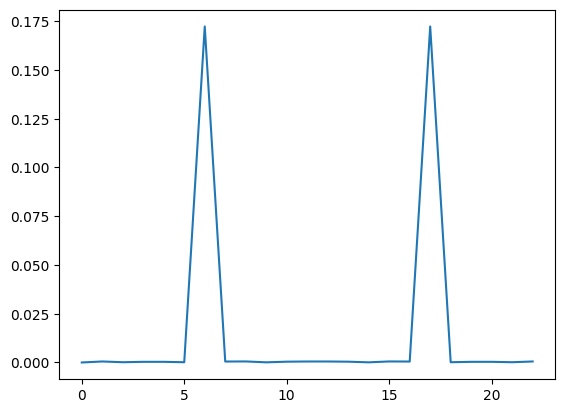

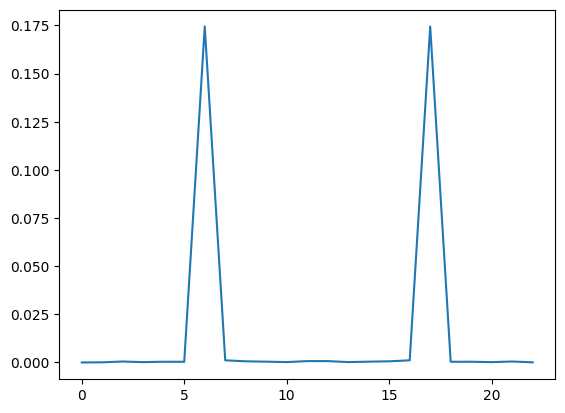

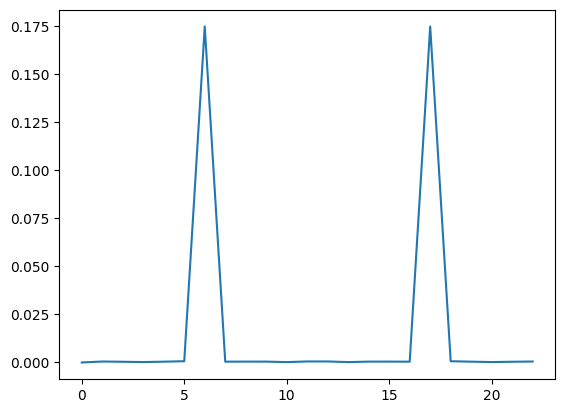

In [302]:
freq_idx = 6
indices = (A[:,freq_idx].abs() > 0.1).nonzero().squeeze()
print(indices)

for i in indices:
    plt.figure()
    plt.plot(A[i,:].abs())

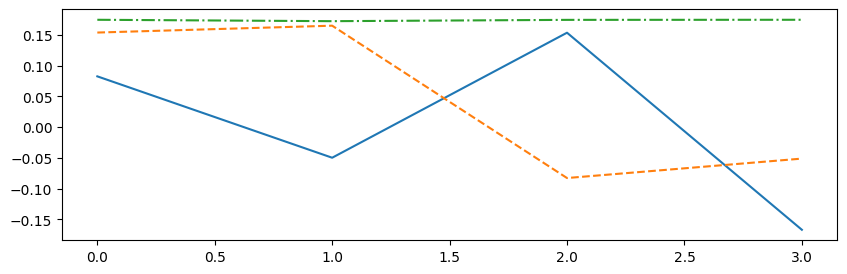

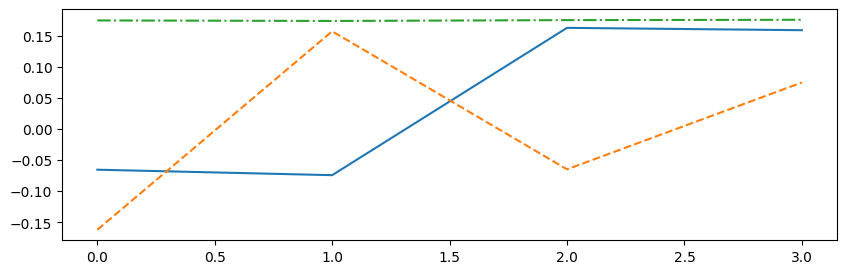

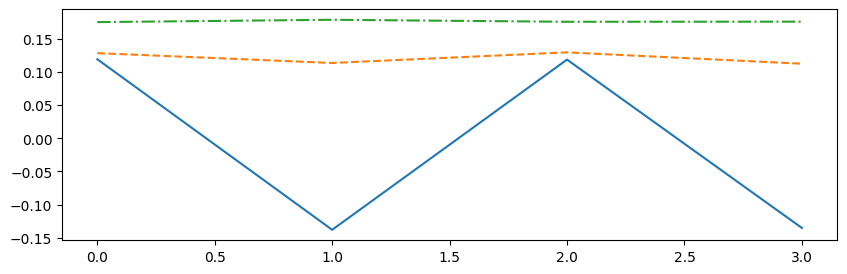

In [303]:
plt.figure(figsize=(10,3))
plt.plot(A[indices,freq_idx].real, '-')
plt.plot(A[indices,freq_idx].imag, '--')
plt.plot(A[indices,freq_idx].abs(), '-.')
# plt.plot(A[indices,freq_idx].angle(), '.')

    
plt.figure(figsize=(10,3))
plt.plot(B[indices,freq_idx].real, '-')
plt.plot(B[indices,freq_idx].imag, '--')
plt.plot(B[indices,freq_idx].abs(), '-.')
# plt.plot(B[indices,freq_idx].angle(), '.')

plt.figure(figsize=(10,3))
plt.plot(C[indices,freq_idx].real, '-')
plt.plot(C[indices,freq_idx].imag, '--')
plt.plot(C[indices,freq_idx].abs(), '-.')
# plt.plot(C[indices,freq_idx].angle(), '.')


In [304]:
print((A[indices,freq_idx] * A[indices[0],freq_idx].conj()).angle() / math.pi * 180)
print((B[indices,freq_idx] * B[indices[0],freq_idx].conj()).angle() / math.pi * 180)
print((C[indices,freq_idx] * C[indices[0],freq_idx].conj()).angle() / math.pi * 180)

tensor([-1.3882e-07,  4.5013e+01, -9.0095e+01,  1.3528e+02])
tensor([-3.7415e-07, -1.3277e+02,  9.0272e+01,  1.3720e+02])
tensor([8.2959e-07, 9.3412e+01, 3.8633e-01, 9.3109e+01])


In [2]:
def compute_err(A, B, C, freq_idx, indices, verbose=False):
    abc = (A[indices,freq_idx] * B[indices,freq_idx] * C[indices,freq_idx]).sum()
    a_b_c_ = (A[indices,-freq_idx] * B[indices,-freq_idx] * C[indices,-freq_idx]).sum()

    ab_c = (A[indices,freq_idx] * B[indices,-freq_idx] * C[indices,freq_idx]).sum()
    ab_c_ = (A[indices,freq_idx] * B[indices,-freq_idx] * C[indices,-freq_idx]).sum()
    abc_ = (A[indices,freq_idx] * B[indices,freq_idx] * C[indices,-freq_idx]).sum()

    a_bc = (A[indices,-freq_idx] * B[indices,freq_idx] * C[indices,freq_idx]).sum()
    a_b_c = (A[indices,-freq_idx] * B[indices,-freq_idx] * C[indices,freq_idx]).sum()
    a_bc_ = (A[indices,-freq_idx] * B[indices,freq_idx] * C[indices,-freq_idx]).sum()
    
    if verbose:
        print(abc+a_b_c_,ab_c+a_bc_,ab_c_+a_bc,abc_+a_b_c)
        
    aa_c = (A[indices,freq_idx].abs() ** 2 * C[indices,freq_idx]).sum()
    bb_c = (B[indices,freq_idx].abs() ** 2 * C[indices,freq_idx]).sum()

    aac = (A[indices,freq_idx] ** 2 * C[indices,freq_idx]).sum()
    bbc = (B[indices,freq_idx] ** 2 * C[indices,freq_idx]).sum()

    a_a_c = (A[indices,-freq_idx] ** 2 * C[indices,freq_idx]).sum()
    b_b_c = (B[indices,-freq_idx] ** 2 * C[indices,freq_idx]).sum()
    
    if verbose:
        print(aa_c, bb_c)
        print(aac,bbc,a_a_c,b_b_c)

    # compute the error
    err = (ab_c_+a_bc).norm() + (abc_+a_b_c).norm() + aac.norm() + bbc.norm() + a_a_c.norm() + b_b_c.norm()
    signal = (abc+a_b_c_).norm()

    return err / signal

In [298]:
for freq_idx in range(1, (d-1)//2+1):
    indices = (A[:,freq_idx].abs() > 0.01).nonzero().squeeze()
    if indices.dim() > 0:
        err = compute_err(A, B, C, freq_idx, indices, verbose=True)
        print(freq_idx, len(indices), err)
        print()

tensor(0.0429-1.6298e-09j) tensor(2.8800e-05-4.6566e-10j) tensor(5.0416e-05+3.4925e-10j) tensor(-0.0002+1.3970e-09j)
tensor(-0.0147-0.0019j) tensor(-0.0146-0.0018j)
tensor(-3.4484e-05-4.2964e-05j) tensor(-2.3304e-05+4.5496e-05j) tensor(4.4364e-05+3.8075e-05j) tensor(-3.8226e-05-1.2093e-05j)
1 4 tensor(0.0110)

tensor(0.0428-1.3242e-09j) tensor(6.9436e-05-3.9581e-09j) tensor(5.6101e-06-2.0955e-09j) tensor(2.2727e-05+1.8626e-09j)
tensor(0.0012+0.0025j) tensor(0.0013+0.0024j)
tensor(-7.3821e-05+0.0002j) tensor(9.9475e-05+8.1650e-05j) tensor(-0.0003+0.0003j) tensor(-0.0005+9.5291e-05j)
2 6 tensor(0.0314)

tensor(0.0428+1.4234e-09j) tensor(-4.8996e-05+1.7462e-10j) tensor(-2.3156e-05-6.9849e-10j) tensor(-1.9019e-05+9.3132e-10j)
tensor(0.0014-0.0003j) tensor(0.0013-0.0002j)
tensor(5.2666e-06-2.3803e-05j) tensor(-8.7917e-05+5.9909e-05j) tensor(-0.0003+0.0003j) tensor(-0.0008+0.0001j)
3 6 tensor(0.0339)

tensor(0.0429-3.1723e-09j) tensor(-7.3968e-05+1.8626e-09j) tensor(5.2819e-05-2.7940e-09j) t

In [449]:
compute_err(A, B, C, indices, verbose=True)

tensor(196.3463+8.1062e-06j) tensor(0.1018-1.9073e-05j) tensor(-0.3867+3.8147e-06j) tensor(1.1832-1.3351e-05j)
tensor(-32.8952-6.9264j) tensor(-35.5649+6.5636j) tensor(42.9922+45.8190j) tensor(21.7633+58.0450j)


tensor(0.9991)

In [32]:
model["layera.weight"].cfloat().cpu().norm()

tensor(25.0517)

In [3]:
# Loss according to theorem
def get_loss(A, B, C):
    d = A.shape[0]
    
    AA = A.conj().t() @ A
    BB = B.conj().t() @ B
    CC = C.conj().t() @ C
    
    # Compute the last term
    #
    indices = list(range(d))
    va = []
    vb = []
    for m in range(1, d):
        indices = indices[1:] + [indices[0]]
        va.append((A * A[indices, :].conj()).sum(dim=0))
        vb.append((B * B[indices, :].conj()).sum(dim=0))
        
    va = torch.stack(va, dim=0)
    vb = torch.stack(vb, dim=0)
        
    loss_term1 = - 4 * (A[1:,:] * B[1:,:] * C[1:,:])
    loss_term2 = 4 * d * (AA * BB * CC)
    norm_ab = AA.diag() + BB.diag()
    loss_term3 = d * (norm_ab @ CC @ norm_ab)
    
    # loss_term4 = (va @ CC @ va.t().conj()).trace() + (vb @ CC @ vb.t().conj()).trace()
    # loss_term4 = d * ((va @ CC) * va.conj()).sum() + d * ((vb @ CC) * vb.conj()).sum() 
    loss_term4 = 0
    
    loss = loss_term1 + loss_term2 + loss_term3 + loss_term4
        
    # Add a constant
    loss_const = 1 - 1.0 / d
    #loss = - (A * B * C).sum() # + A (AA * BB * CC).sum() # + AA.diag() @ CC @ BB.diag()
    # wv = (AA + BB).diag() 
    # loss = - (A * B * C).sum() + wv.t() @ CC @ wv # + AA.diag() @ CC @ BB.diag()
    return loss + loss_const, loss_term1, loss_term2, loss_term3, loss_term4

In [17]:
# Load a series of models and check their monomial potentials
def construct_bases(d):
    # compute fourier transform in

    v = torch.ones(d, dtype=torch.cfloat)
    # unit 
    for i in range(d):
        v[i].real = math.cos(2 * math.pi * i / d)
        v[i].imag = math.sin(2 * math.pi * i / d)

    fourierBases = torch.zeros(d, d, dtype=torch.cfloat, requires_grad=False)
    for i in range(d):
        fourierBases[:,i] = v ** i
        
    return fourierBases

import glob

def load_model_traj(root, indices=None):
    fourierBases = None

    As = []
    Bs = []
    Cs = []
    ts = []
    
    if indices is None:
        filenames = glob.glob(os.path.join(root, "model*.pt"))
    else:
        filenames = [ glob.glob(os.path.join(root, f"model{idx:05}*.pt"))[0] for idx in indices ]

    # Load all models and their ABC
    for f_name in sorted(filenames):
        # print(f_name)
        data = torch.load(f_name, map_location="cpu")
        model = data["model"]
        if fourierBases is None:
            d = model["layera.weight"].shape[1]
            fourierBases = construct_bases(d)

        A = model["layera.weight"].cfloat() @ fourierBases.conj() / d
        B = model["layerb.weight"].cfloat() @ fourierBases.conj() / d
        C = model["layerc.weight"].cfloat().t() @ fourierBases / d

        As.append(A.t())
        Bs.append(B.t())
        Cs.append(C.t())
        ts.append(data["results"][-1]["epoch"])

        # Compute the loss. 

    As = torch.stack(As, dim=2)
    Bs = torch.stack(Bs, dim=2)
    Cs = torch.stack(Cs, dim=2)

    final_results = data["results"]
    
    return As, Bs, Cs, ts, final_results
        

In [3]:
# root = "/private/home/yuandong/luckmatters/ssl/real-dataset"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-04/16-22-25"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-04/16-33-24"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-04/16-32-02"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-04/16-36-14"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-08/21-14-50"
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-08/21-16-01"

# 0.5% test case
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-08/21-18-07"

# 50% test case
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-09/03-18-22"

# 30% test case
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-09/03-26-15"

# 10% test case
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-09/03-29-35"

# 1% test case 
root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-08/21-27-22"

# seed 12
# root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-09/03-31-58"

# M=127
# root = "/private/home/yuandong/luckmatters/ssl/real-dataset/outputs/2024-09-09/03-36-42"

# sweep
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/1"

# M = 71
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/5/"


# M = 23 but with 5e-5 weight decay
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/60/"

# M = 23 but with 512 hidden size
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/15/"
# M = 23 but with 1024 hidden size
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/30/"
# M = 23 but with 2048 hidden size
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/45/"

# M = 23 but with 512 hidden size + 5e-5
# root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/75/"
# M = 23 but with 1024 hidden size + 5e-5
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/90/"
# M = 23 but with 2048 hidden size + 5e-5
# root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/105/"

root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/"

root = "/checkpoint/yuandong/outputs/2024-09-12/16-56-18/"

# root = "/checkpoint/yuandong/outputs/2024-09-13/03-31-35"

# smaller learning rate (0.002)
# root = "/checkpoint/yuandong/outputs/2024-09-13/14-26-46"

import glob

all_results = []

folders = [ folder for folder in glob.glob(os.path.join(root, "*")) if os.path.isdir(folder) ]
    
def process_one(folder):    
    try:
        cfg = common_utils.MultiRunUtil.load_cfg(folder)
        cfg = { entry.split("=")[0] : entry.split("=")[1] for entry in cfg }
        cfg["folder"] = folder
        return cfg
    except:
        return None

# Now run parallel loop
import multiprocessing as mp
import tqdm

with mp.Pool(32) as pool:
    all_cfgs = list(filter(lambda x: x is not None, tqdm.tqdm(pool.imap(process_one, folders), total=len(folders))))
    

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 7094.04it/s]


In [4]:
import pandas as pd
all_cfgs = pd.DataFrame(all_cfgs)

In [5]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.7.1


In [18]:
freq_map = dict()

#wd = "1e-04"
# wd = "0.0001"
wd = "5e-05"
for (M, hidden_size), tbl in all_cfgs[all_cfgs["weight_decay"] == wd].groupby(["M", "hidden_size"]):
    # compute their statistics
    print(M, hidden_size)
    freq_patterns = []
    for folder in tbl["folder"]:
        print(folder)
        # Load them
        # data = torch.load(os.path.join(folder, "data.pth"), map_location="cpu")
        try:
            As, Bs, Cs, ts, _ = load_model_traj(folder, indices=[9900])

            d = As.shape[0]
            # compute the 
            freq_patterns.append((As[1:(d-1)//2+1,:,-1].abs() > 0.05).sum(dim=1))
        except Exception as e:
            print(e)
            pass
    # 
    if len(freq_patterns) > 0:
        freq_map[(M, hidden_size)] = torch.cat(freq_patterns)

127 1024
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/100
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/104
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/102
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/101
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/103
127 2048
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/116
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/119
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/118
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/117
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/115
127 256
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/71
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/73
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/70
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/72
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/74
127 512
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/88
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/85
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/87
/checkpoint/yuandong

In [21]:
freq_map = dict()

q = "512"
for (M, weight_decay), tbl in all_cfgs[all_cfgs["hidden_size"] == q].groupby(["M", "weight_decay"]):
    # compute their statistics
    print(M, weight_decay)
    freq_patterns = []
    for folder in tbl["folder"]:
        print(folder)
        try:
            # Load them
            # data = torch.load(os.path.join(folder, "data.pth"), map_location="cpu")
            As, Bs, Cs, ts, _ = load_model_traj(folder, indices=[9900])

            d = As.shape[0]
            # compute the freq pattern. 
            freq_patterns.append((As[1:(d-1)//2+1,:,-1].abs() > 0.05).sum(dim=1))
        except:
            pass
    # 
    if len(freq_patterns) > 0:
        freq_map[(M, weight_decay)] = torch.cat(freq_patterns)

127 0.0001
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/147
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/148
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/149
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/146
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/145
127 0.0002
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/206
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/209
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/205
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/207
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/208
127 0.0005
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/268
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/267
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/265
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/266
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/269
127 1e-05
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/26
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/25
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/27
/check

In [38]:
torch.save(data_map, "/private/home/yuandong/luckmatters/ssl/real-dataset/cogo/data/data_map.pkl")

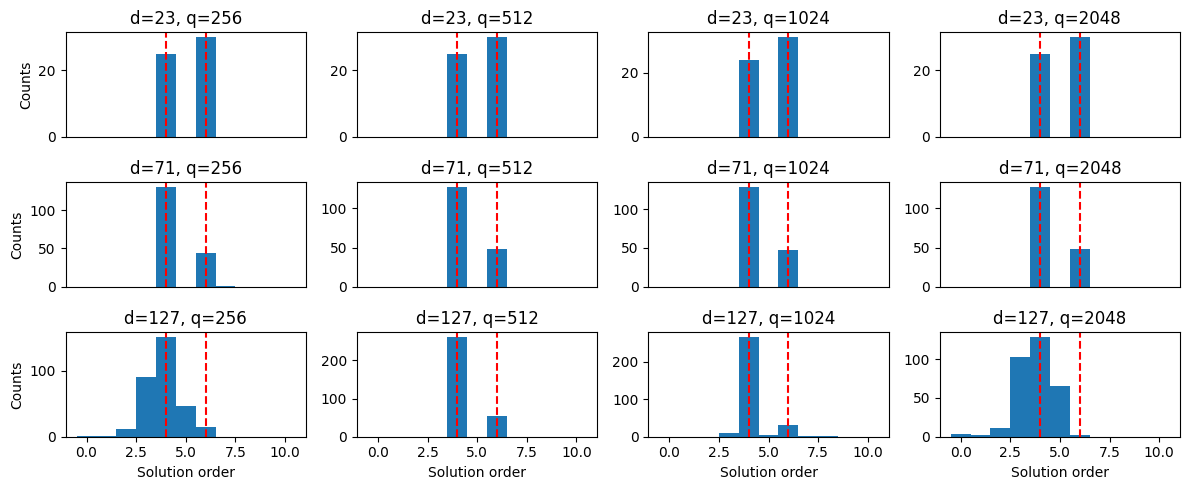

In [20]:
import numpy as np
bin_edges = np.linspace(-0.5, 10.5, 12)

Ms = ["23", "71", "127"]
M_reverse = { M : i for i, M in enumerate(Ms) }

hiddens = ["256", "512", "1024", "2048"]
hiddens_reverse = { h : i for i, h in enumerate(hiddens) }

plt.figure(figsize=(12,5))
for k, v in freq_map.items():    
    try:
        row_idx = M_reverse[k[0]]
        col_idx = hiddens_reverse[k[1]]
    except:
        continue
    
    plt.subplot(3, 4, row_idx * 4 + col_idx + 1)
    plt.hist(v, bins=bin_edges)
    plt.axvline(4, color="r", linestyle='--')
    plt.axvline(6, color="r", linestyle='--')
    plt.title(f"d={k[0]}, q={k[1]}")
    if col_idx == 0:
        plt.ylabel("Counts")
    if row_idx != 2:
        plt.xticks([])
    else:
        plt.xlabel("Solution order")
        
        
plt.tight_layout()
plt.savefig(f"solution_distri_{wd}.pdf")

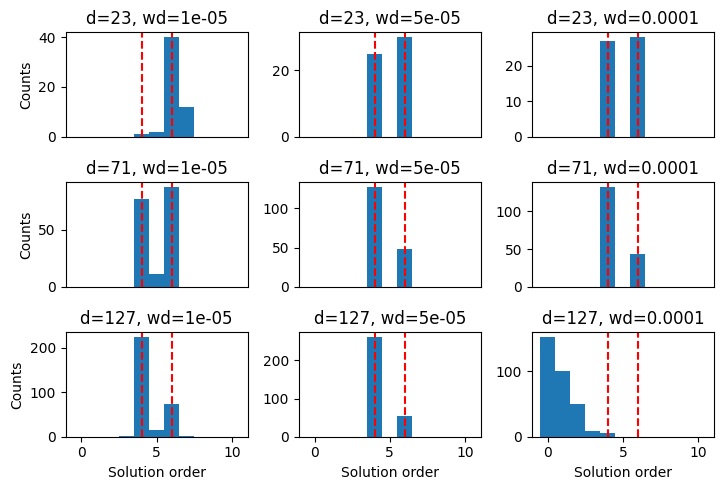

In [24]:
import numpy as np
bin_edges = np.linspace(-0.5, 10.5, 12)

Ms = ["23", "71", "127"]
M_reverse = { M : i for i, M in enumerate(Ms) }

# wds = ["1e-05", "5e-05", "0.0001", "0.0002", "0.0005"]
# wds = ["5e-05", "0.0001", "0.0002"]
wds = ["1e-05", "5e-05", "0.0001"]

wd_reverse = { h : i for i, h in enumerate(wds) }

plt.figure(figsize=(12,5))
for k, v in freq_map.items():
    try:
        row_idx = M_reverse[k[0]]
        col_idx = wd_reverse[k[1]]
    except:
        continue
    
    plt.subplot(3, 5, row_idx * 5 + col_idx + 1)
    plt.hist(v, bins=bin_edges)
    plt.axvline(4, color="r", linestyle='--')
    plt.axvline(6, color="r", linestyle='--')
    plt.title(f"d={k[0]}, wd={k[1]}")
    if col_idx == 0:
        plt.ylabel("Counts")
    if row_idx != 2:
        plt.xticks([])
    else:
        plt.xlabel("Solution order")
        
        
plt.tight_layout()
plt.savefig(f"solution_distri_{q}_subset.pdf")

In [77]:
def analyze_component(F):
    q = F.shape[1]
    # First apply [-1, -1, 1] transform if the polarity has issues
    # Fprod = F.prod(dim=0)
    # F[:, Fprod.real > 0] *= -1
    
    # Determine the permutation
    min_err = 1e8
    min_perm = None
    all_errs = []
    for perm in itertools.permutations(range(q)):
        tmpF = F[:, perm]

        # divide by 2
        ratio = tmpF[:, :q//2] / tmpF[:, q//2:]
        err = (ratio - ratio.mean(dim=1, keepdim=True)).norm()
        
#         ratio = tmpF[2, :q//2] / tmpF[2, q//2:]
#         err = (ratio - ratio.mean()).norm()

        # ratio should be constant per row 
        all_errs.append(err)
        if err < min_err:
            min_err = err
            min_perm = perm
            
    all_errs = torch.stack(all_errs)
    # print(all_errs)
    print(min_err, min_perm)
    
    # Then specify the min_perm and do decomposition
    F = F[:, min_perm]
    
    if min_err > 0.1:
        print("May be 2 * 2 + 2")
        # further decompose 
        ratio_test = F[:, q//2:] / F[:, :q//2]
        import pdb
        pdb.set_trace()
        idd = ((ratio_test[0,:] - ratio_test[0,0]).abs() > 0.2).nonzero().squeeze(1).tolist()
        if len(idd) == 2:
            # 0 is the culprit
            sec2 = F[:, [4,5]]
            sec1 = F[:, [1,2]]
            component3 = F[:, [0,3]]
        else:
            if idd[0] == 1:
                sec2 = F[:, [3,5]]
                sec1 = F[:, [0,2]]
            else:
                sec2 = F[:, [3,4]]
                sec1 = F[:, [0,1]]
                
            component3 = F[:, [idd[0], idd[0] + 3]]
    else:
        sec2 = F[:, q//2:]
        sec1 = F[:, :q//2]
        component3 = None
        
    ratio = sec2 / sec1
    err = (ratio - ratio.mean(dim=1, keepdim=True)).norm()
    print("Confirmed err: ", err)
    component1 = ratio.mean(dim=1)
    component1 = torch.stack([torch.ones((3,), dtype=component1.dtype), component1], dim=1)
    
    if component3 is not None:
        ratio32 = component3[:,0] / sec1[:,0]
        component3 = component3 / component3[:,0][:,None]
    
    component2 = sec1 / sec1[:,0][:,None]
    
    return component1, component2, ratio, (ratio32, component3)
    

In [7]:
def round2nearest(A, b=1):
    return A.round(decimals=0)

import itertools

# categorize one solution
# for each node, get their best freq
A = As[:,:,-1]
B = Bs[:,:,-1]
C = Cs[:,:,-1]

d = A.shape[0]

best_freqs_max, best_freqs = A[:(d-1)//2+1].abs().max(dim=0)

freq_filter = best_freqs_max > 0.05
best_freqs = best_freqs[freq_filter].tolist()
best_freqs_indices = freq_filter.nonzero().squeeze().tolist()

for k in range(1, (d-1)//2 + 1):
    indices = [ idx for idx,kk in zip(best_freqs_indices, best_freqs) if k == kk ]
    
    print(indices)
    Ak = A[k,indices]
    Bk = B[k,indices]
    Ck = C[k,indices]
    q = len(indices)
    
    F = torch.stack([Ak, Bk, Ck], dim=0)
    
    component1, component2, ratio, _ = analyze_component(F)
        
    print("Ratio")
    print(ratio)
    
    print("Decomposition")
    print(component1)
    print(component2)
    
#     if component3 is not None:
#         print(component3)
#         print(ratio32)
        # break
        # import pdb
        # pdb.set_trace()
    
    # compute the angles. 
    # Round to the nearest 10s degree.     
    ang_A = (Ak * Ak[0].conj()).angle() / math.pi * 180
    ang_B = (Bk * Bk[0].conj()).angle() / math.pi * 180
    ang_C = (Ck * Ck[0].conj()).angle() / math.pi * 180
    
    print(round2nearest(ang_A))
    print(round2nearest(ang_B))
    print(round2nearest(ang_C))
    
    # check_constraints(A[:,indices], B[:,indices], C[:,indices])
    print("-----" * 5)


NameError: name 'As' is not defined

In [8]:
def analyze_component_v2(F):
    q = F.shape[1]
    # Determine the permutation
    min_err = 1e8
    min_perm = None
    all_errs = []
    for perm in itertools.permutations(range(q)):
        tmpF = F[:, perm]

        ratio = tmpF[2, :q//2] / tmpF[2, q//2:]
        err = (ratio - ratio.mean()).norm()

        # ratio should be constant per row 
        all_errs.append(err)
        if err < min_err:
            min_err = err
            min_perm = perm
            
    all_errs = torch.stack(all_errs)
    # print(all_errs)
    # print(min_err, min_perm)
    
    # Then specify the min_perm and do decomposition
    F = F[:, min_perm]
    
    # further decompose 
    ratio_test = F[0, q//2:] / F[0, :q//2]
    
    # if there is any place that requires applying [-1, -1, 1], apply it
    ratio_test_err = (ratio_test - ratio_test[0]).norm()
    idd = ((ratio_test - ratio_test[0]).abs() > 0.2).nonzero().squeeze(1).tolist()
    
    if len(idd) > 0:
        # print(f"Correcting [-1,-1,1] with ratio_test_err = {ratio_test_err}")
        F[:2, idd] *= -1
    
    sec2 = F[:, q//2:]
    sec1 = F[:, :q//2]
        
    ratio = sec2 / sec1
    err = (ratio - ratio.mean(dim=1, keepdim=True)).norm()
    # print("Confirmed err: ", err)
    component1 = ratio.mean(dim=1)
    component1 = torch.stack([torch.ones((3,), dtype=component1.dtype), component1], dim=1)
    
    component2 = sec1 / sec1[:,0][:,None]
    
    return component1, component2, err, ratio


In [9]:
def check_constraint(F):
    print("Rc")
    print(f"abc = {(F[0,:] * F[1,:] * F[2,:]).sum()}")
    print(f"^abc = {(F[0,:].conj() * F[1,:] * F[2,:]).sum()}")
    print(f"a^bc = {(F[0,:] * F[1,:].conj() * F[2,:]).sum()}")
    print(f"ab^c = {(F[0,:] * F[1,:] * F[2,:].conj()).sum()}")
    print("Rn")
    print(f"a^ac = {(F[0,:] * F[0,:].conj() * F[2,:]).sum()}")
    print(f"b^bc = {(F[1,:] * F[1,:].conj() * F[2,:]).sum()}")
    print("R*")
    print(f"aac = {(F[0,:] * F[0,:] * F[2,:]).sum()}")
    print(f"bbc = {(F[1,:] * F[1,:] * F[2,:]).sum()}")
    print(f"^a^ac = {(F[0,:].conj() * F[0,:].conj() * F[2,:]).sum()}")
    print(f"^b^bc = {(F[1,:].conj() * F[1,:].conj() * F[2,:]).sum()}")


In [10]:
def round2nearest(A, b=1):
    return A.round(decimals=0)

# Check types of component1 and component2
def check_component(A):
    #define some constant
    one = torch.ones(1, dtype=torch.cfloat)
    plus_i = torch.zeros(1, dtype=torch.cfloat)
    plus_i.imag = 1
    
    minus_i = torch.zeros(1, dtype=torch.cfloat)
    minus_i.imag = -1
    
    normalize = True
    
    if normalize:
        A = A / A.prod(dim=0,keepdim=True).pow(1.0/3)
    
    thres = 0.1
    
    if A.shape[1] == 2:
        # order-2 
        # import pdb
        # pdb.set_trace()
        if (A[0,1] * A[1,1] * A[2,1] - one).abs() > thres:
            return "order-2-unnormalized"
        if (A[2,1] - plus_i).abs() < thres or (A[2,1] - minus_i).abs() < thres:
            # [1, xi], [1, \pm i\bar xi], [1, \pm i]
            return "order-2-xi", (A[0,1].item(),)
        if (A[2,1] - one).abs() < thres and ((A[0,1] - plus_i).abs() < thres or (A[0,1] - minus_i).abs() < thres):
            return "order-2-4c", (A[0,1].item(),)
        #if (A[2,1] + one).abs() < thres and ((A[0,1] - one).abs() < thres or (A[0,1] + one).abs() < thres):
        #    return "order-2-one", (1,)
        if (A[0,1] + A[1,1]).abs() < thres:
            return "order-2-nu", (A[0,1].item(),)
        return "order-2-unknown", None
    
    elif A.shape[1] == 3:
        omega3 = torch.ones(1, dtype=torch.cfloat)
        omega3[0].real = math.cos(2*math.pi/3)
        omega3[0].imag = math.sin(2*math.pi/3)
        
        if (A[0,1] * A[1,1] * A[2,1] - one).abs() > thres:
            return "order-3-unnormalized-1", None
        if (A[0,2] * A[1,2] * A[2,2] - one).abs() > thres:
            return "order-3-unnormalized-2", None
        
        # remove -1, -1, 1 factor for each col
        for i in (1,2):
            if A[0,i].real > 0:
                A[:2,i] *= -1
                
        if A[2,1].imag < 0:
            A = A.conj()
        # check
        if (A[:,1] - omega3).norm() < thres * math.sqrt(3) and (A[:,2] - omega3.conj()).norm() < thres * math.sqrt(3):
            return "order-3-syn", (1, 1)
        
        if (A[2,1] - omega3).norm() < thres and (A[2,2] - omega3.conj()).norm() < thres:
            return "order-3-syn-ab", (A[0,1] / omega3, A[0,2] / omega3)
        
        return "order-3-unknown", None
    
    else:
        return "error", None

import itertools
from collections import Counter

# categorize one solution
# for each node, get their best freq
def analyze_solution(A, B, C, stats4, stats6, errs4, errs6):
    d = A.shape[0]
    q = A.shape[1]

    best_freqs_max, best_freqs = A[:(d-1)//2+1].abs().max(dim=0)

    freq_filter = best_freqs_max > 0.05
    best_freqs = best_freqs[freq_filter].tolist()
    best_freqs_indices = freq_filter.nonzero().squeeze(dim=1).tolist()
    
    for k in range(1, (d-1)//2 + 1):
        indices = [ idx for idx,kk in zip(best_freqs_indices, best_freqs) if k == kk ]

        # print(indices)
        Ak = A[k,indices]
        Bk = B[k,indices]
        Ck = C[k,indices]
        q = len(indices)
        
        if q not in (6, 4):
            continue

        F = torch.stack([Ak, Bk, Ck], dim=0)

        component1, component2, err, ratio = analyze_component_v2(F)

#         print("Ratio")
#         print(ratio)

#         print("Decomposition")

#         print("component1")
#         print(component1)
#         check_constraint(component1)

#         print("component2")
#         print(component2)
#         check_constraint(component2)

        if q == 4:
            stats = stats4
            errs = errs4
        elif q == 6:
            stats = stats6
            errs = errs6
            
        res1, param1 = check_component(component1)
        res2, param2 = check_component(component2)
        if res1 > res2:
            res1, res2 = res2, res1
            component1, component2 = component2, component1
            param1, param2 = param2, param1
            
        if res1 == "order-2-unknown" or res2 == "order-3-unknown":
            print(f"===== Warning!! res1 = {res1}, res2 = {res2}, err = {err}")
            # import pdb
            # pdb.set_trace()
        
        stats["cnt"].append(1)
        if err > math.sqrt(F.shape[0] * F.shape[1]) * 0.1:
            # not factorable
            stats["non-factorable"].append(1)
        else:
            stats[(res1, res2)].append((param1, param2))
            errs.append(err.item())

        # compute the angles. 
        # Round to the nearest 10s degree.     
#         ang_A = (Ak * Ak[0].conj()).angle() / math.pi * 180
#         ang_B = (Bk * Bk[0].conj()).angle() / math.pi * 180
#         ang_C = (Ck * Ck[0].conj()).angle() / math.pi * 180

#         print(round2nearest(ang_A))
#         print(round2nearest(ang_B))
#         print(round2nearest(ang_C))

#         # check_constraints(A[:,indices], B[:,indices], C[:,indices])
#         print("-----" * 5)


In [15]:
stats4 = Counter()
stats6 = Counter()
errs4 = []
errs6 = []

analyze_solution(As[:,:,-1], Bs[:,:,-1], Cs[:,:,-1], stats4, stats6, errs4, errs6)

In [96]:
all_cfgs

,activation,loss_func,num_epochs,weight_decay,hidden_size,learning_rate,M,test_size,save_interval,seed,+run_name,+githash,+sweep_filename,folder
0,sqr,mse,10000,1e-05,256,0.01,23,0.1,100,1,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
1,sqr,mse,10000,1e-05,512,0.01,23,0.1,100,1,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
2,sqr,mse,10000,1e-05,512,0.01,127,0.1,100,2,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
3,sqr,mse,10000,1e-05,512,0.01,71,0.1,100,1,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
4,sqr,mse,10000,1e-05,512,0.01,23,0.1,100,4,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,sqr,mse,10000,0.0005,2048,0.01,23,0.1,100,3,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
296,sqr,mse,10000,0.0005,1024,0.01,71,0.1,100,3,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
297,sqr,mse,10000,0.0005,1024,0.01,23,0.1,100,3,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...
298,sqr,mse,10000,0.0005,1024,0.01,127,0.1,100,1,09-12_16-56,ba2de90,/checkpoint/yuandong/sweeps/_private_home_yuan...,/checkpoint/yuandong/outputs/2024-09-12/16-56-...


In [41]:
q = "512"
wd = "5e-05"
# wd = "0.0001"

from collections import defaultdict


all_stats = defaultdict(lambda: dict(stats4 = defaultdict(list), stats6 = defaultdict(list), errs4 = [], errs6 = []))

for (M, weight_decay, seed), tbl in all_cfgs[all_cfgs["hidden_size"] == q].groupby(["M", "weight_decay", "seed"]):
    # compute their statistics
    if weight_decay != wd:
        continue
        
    entry = all_stats[M, seed]
        
    stats4 = entry["stats4"]
    stats6 = entry["stats6"]
    errs4 = entry["errs4"]
    errs6 = entry["errs6"]
    
    for folder in tbl["folder"]:
        print(folder)
        # try:
        # Load them
        # data = torch.load(os.path.join(folder, "data.pth"), map_location="cpu")
        As, Bs, Cs, ts, _ = load_model_traj(folder, indices=[9900])

        analyze_solution(As[:,:,-1], Bs[:,:,-1], Cs[:,:,-1], stats4, stats6, errs4, errs6)          
#             print("Order-4")
#             print(stats4)
#             print(torch.Tensor(errs4).mean())

#             print("Order-6")
#             print(stats6)
#             print(torch.Tensor(errs6).mean())

#         except Exception as e:
#             print(e)
#             pass


/checkpoint/yuandong/outputs/2024-09-12/16-56-18/85
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/86
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/87
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/88
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/89
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/75
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/76
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/77
===== Warning!! res1 = order-2-nu, res2 = order-3-unknown, err = 0.7165929079055786
===== Warning!! res1 = order-2-nu, res2 = order-3-unknown, err = 2.382235288619995
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/78
===== Warning!! res1 = order-2-4c, res2 = order-3-unknown, err = 0.002400272758677602
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/79
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/80
/checkpoint/yuandong/outputs/2024-09-12/16-56-18/81
===== Warning!! res1 = order-2-nu, res2 = order-3-unknown, err = 0.24013783037662506
/checkpoint/yuandong/outputs/2024-09-1

In [40]:
for d in [23, 71, 127]:
    result = defaultdict(list)
    n = (d - 1) // 2
    
    for i in range(1,6):
        s = all_stats[(str(d), str(i))]
        result["err_4"].append(torch.Tensor(s["errs4"]).mean())
        result["err_6"].append(torch.Tensor(s["errs6"]).mean())
        
        s4 = s["stats4"]
        s6 = s["stats6"]
        
        n4 = len(s4["cnt"])
        n6 = len(s6["cnt"])
        
        result["1nonfact_4"].append(len(s4["non-factorable"]) / n4)
        result["1nonfact_6"].append(len(s6["non-factorable"]) / n6)
        
        nfact = n4 + n6 - len(s4["non-factorable"]) - len(s6["non-factorable"])
        
        n4_4cxi = len(s4[('order-2-4c', 'order-2-xi')])
        n6_nusyn = len(s6[('order-2-nu', 'order-3-syn')])
        n6_4csynab = len(s6[('order-2-4c', 'order-3-syn-ab')]) + len(s6[('order-2-4c', 'order-3-syn')])
        
        result["sol_4_4cxi"].append(n4_4cxi / nfact)
        result["sol_6_nusyn"].append(n6_nusyn / nfact)
        result["sol_6_4csynab"].append(n6_4csynab / nfact)
        result["sol_others"].append((nfact - n4_4cxi - n6_nusyn - n6_4csynab) / nfact)
        
        result["0_non_46"].append(n - n4 - n6)
         
    # print stats
    print(f"d = {d}:")
    rows = ""
    row_names = ""
    
    for k in sorted(result.keys()):
        result[k] = torch.Tensor(result[k])
        mean = result[k].mean()
        std = result[k].std() / math.sqrt(len(result[k]))
        
        # if k.startswith("err"):
        if not k.startswith("0_"):
            row = f"${mean*100:.2f}${{\\tiny$\\pm {std*100:.2f}$}}"
        else:
            row = f"${mean:.2f}${{\\tiny$\\pm {std:.2f}$}}" 
        # else:
        #    row = f"${mean:.2f} \pm {std:.2f}$"
            
        rows += "& " + row 
        row_names += "& " + k
            
    print(row_names)
    print(rows)
    print()
    print()


d = 23:
& 0_non_46& 1nonfact_4& 1nonfact_6& err_4& err_6& sol_4_4cxi& sol_6_4csynab& sol_6_nusyn& sol_others
& $0.00${\tiny$\pm 0.00$}& $0.00${\tiny$\pm 0.00$}& $2.86${\tiny$\pm 2.86$}& $0.05${\tiny$\pm 0.00$}& $6.79${\tiny$\pm 1.38$}& $44.36${\tiny$\pm 1.09$}& $11.09${\tiny$\pm 3.38$}& $24.00${\tiny$\pm 5.38$}& $20.55${\tiny$\pm 5.51$}


d = 71:
& 0_non_46& 1nonfact_4& 1nonfact_6& err_4& err_6& sol_4_4cxi& sol_6_4csynab& sol_6_nusyn& sol_others
& $0.00${\tiny$\pm 0.00$}& $0.00${\tiny$\pm 0.00$}& $0.00${\tiny$\pm 0.00$}& $0.03${\tiny$\pm 0.00$}& $4.84${\tiny$\pm 2.02$}& $73.14${\tiny$\pm 1.46$}& $4.00${\tiny$\pm 0.70$}& $18.86${\tiny$\pm 1.46$}& $4.00${\tiny$\pm 2.80$}


d = 127:
& 0_non_46& 1nonfact_4& 1nonfact_6& err_4& err_6& sol_4_4cxi& sol_6_4csynab& sol_6_nusyn& sol_others
& $3.00${\tiny$\pm 1.76$}& $1.12${\tiny$\pm 0.46$}& $5.00${\tiny$\pm 5.00$}& $0.13${\tiny$\pm 0.07$}& $0.49${\tiny$\pm 0.07$}& $90.07${\tiny$\pm 1.84$}& $1.00${\tiny$\pm 0.41$}& $8.59${\tiny$\pm 2.02$}& $0.35${

In [226]:
result

defaultdict(list,
            {'err_4': tensor([0.0003, 0.0056, 0.0064, 0.0003, 0.0003]),
             'err_6': tensor([0.0102, 0.0148, 0.0080, 0.0096, 0.0039]),
             '1nonfact_4': tensor([0.0000, 0.0377, 0.0370, 0.0000, 0.0000]),
             '1nonfact_6': tensor([0., 0., 0., 0., 0.]),
             'sol_4_4cxi': tensor([0.8254, 0.8361, 0.8197, 0.8254, 0.8413]),
             'sol_6_nusyn': tensor([0.1429, 0.1311, 0.1311, 0.1746, 0.1270]),
             'sol_6_4csynab': tensor([0.0317, 0.0328, 0.0164, 0.0000, 0.0317]),
             'sol_others': tensor([0.0000, 0.0000, 0.0328, 0.0000, 0.0000]),
             '0_n4': tensor([-1.8612e-13,  4.5803e-41, -1.8612e-13,  4.5803e-41,  1.4013e-45,
                      0.0000e+00,  9.1084e-44,  0.0000e+00, -6.4383e+32,  3.0941e-41,
                     -1.8153e+34,  3.0941e-41,  1.4013e-45,  0.0000e+00,  4.6243e-44,
                      0.0000e+00, -6.6793e+32,  3.0941e-41, -3.5173e+33,  3.0941e-41,
                      1.4349e-42,  0.000

In [14]:
def v_annotate(expr, upper, fontsize, color='r', margin=0.1):
    expr_val = eval(expr)
    plt.axvline(expr_val, color=color, linestyle='--', linewidth=0.75)
    expr = expr.replace("math.", "\\").replace("*", "")
    plt.annotate(f"${expr}$", (expr_val + margin, upper), fontsize=fontsize)

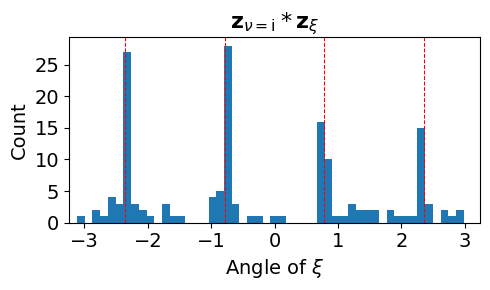

In [15]:
# draw histogram
sol_type = ('order-2-4c', 'order-2-xi')

params = []

for d in [23, 71, 127]:
    for i in range(1,6):
        s = all_stats[(str(d), str(i))]
        s4 = s["stats4"]

        for sol in s4[sol_type]:
            xi = torch.tensor(sol[1][0])
            params.append(xi.angle())
            
plt.figure(figsize=(5,3))
    
plt.hist(params, bins=50)
plt.axis([-math.pi - 0.1, math.pi + 0.1, None, None])

label_fontsize = 14
plt.ylabel("Count", fontsize=label_fontsize)
plt.xlabel(r"Angle of $\xi$", fontsize=label_fontsize)
plt.xticks(fontsize=label_fontsize)
plt.yticks(fontsize=label_fontsize)
plt.title(r"$\mathbf{z}_{\nu=\mathrm{i}} * \mathbf{z}_\xi$", fontsize=label_fontsize+2)

upper = 65
fontsize = 14

v_annotate("math.pi/4", upper, fontsize)
v_annotate("-math.pi/4", upper, fontsize)
v_annotate("3*math.pi/4", upper, fontsize)
v_annotate("-3*math.pi/4", upper, fontsize)

plt.tight_layout()
plt.savefig("angle_of_xi.pdf")

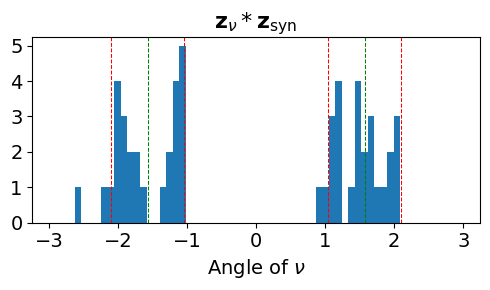

In [16]:
# draw histogram
sol_type = ('order-2-nu', 'order-3-syn')
sol_type2 = ('order-2-4c', 'order-3-syn')

params = []

for d in [23, 71, 127]:
    for i in range(1,6):
        s = all_stats[(str(d), str(i))]
        s6 = s["stats6"]

        for sol in s6[sol_type]:
            nu = torch.tensor(sol[0][0])
            params.append(nu.angle())
            
        for sol in s6[sol_type2]:
            nu = torch.tensor(sol[0][0])
            params.append(nu.angle())

            
plt.figure(figsize=(5,3))
    
label_fontsize = 14
plt.hist(params, bins=50)
plt.axis([-math.pi - 0.1, math.pi + 0.1, None, None])
# plt.ylabel("Count", fontsize=label_fontsize)
plt.xlabel(r"Angle of $\nu$", fontsize=label_fontsize)
plt.xticks(fontsize=label_fontsize)
plt.yticks(fontsize=label_fontsize)
plt.title(r"$\mathbf{z}_{\nu} * \mathbf{z}_{\mathrm{syn}}$", fontsize=label_fontsize+2)

upper = 10
fontsize = 14

v_annotate("math.pi/2", 8, fontsize, color='g', margin=-0.2)
v_annotate("-math.pi/2", 8, fontsize, color='g', margin=-0.4)


v_annotate("math.pi/3", upper, fontsize, margin=-0.5)
v_annotate("2*math.pi/3", upper, fontsize, margin=0.1)
v_annotate("-math.pi/3", upper, fontsize, margin=0)
v_annotate("-2*math.pi/3", upper, fontsize, margin=-1)

plt.tight_layout()
plt.savefig("angle_of_nu.pdf")

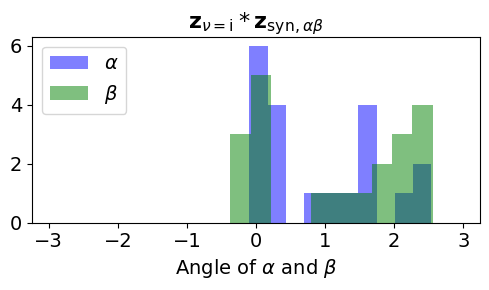

In [17]:
# draw histogram
sol_type = ('order-2-4c', 'order-3-syn-ab')
sol_type2 = ('order-2-4c', 'order-3-syn')

params_alpha = []
params_beta = []

for d in [23, 71, 127]:
    for i in range(1,6):
        s = all_stats[(str(d), str(i))]
        s6 = s["stats6"]

        for sol in s6[sol_type]:
            alpha_beta = torch.tensor(sol[1])
            params_alpha.append(alpha_beta[0].angle())
            params_beta.append(alpha_beta[1].angle())
            
        for sol in s6[sol_type2]:
            params_alpha.append(0)
            params_beta.append(0)

            
plt.figure(figsize=(5,3))
    
plt.hist(params_alpha, bins=10, color='b', label=r"$\alpha$", alpha = 0.5)
plt.hist(params_beta, bins=10, color='g', label=r"$\beta$", alpha = 0.5)
plt.axis([-math.pi - 0.1, math.pi + 0.1, None, None])
# plt.ylabel("Count", fontsize=label_fontsize)
plt.xlabel(r"Angle of $\alpha$ and $\beta$", fontsize=label_fontsize)
plt.legend(fontsize=label_fontsize)
plt.xticks(fontsize=label_fontsize)
plt.yticks(fontsize=label_fontsize)
plt.title(r"$\mathbf{z}_{\nu=\mathrm{i}} * \mathbf{z}_{\mathrm{syn},\alpha\beta}$", fontsize=label_fontsize+2)

plt.tight_layout()
plt.savefig("angle_of_alpha_beta.pdf")

# v_annotate("math.pi/3", upper, fontsize)
# v_annotate("2*math.pi/3", upper, fontsize)
# v_annotate("-math.pi/3", upper, fontsize, margin=-0.7)
# v_annotate("-2*math.pi/3", upper, fontsize, margin=-0.9)

In [192]:
sol[1]

(tensor([-0.3425+0.9343j]), tensor([0.8941+0.4334j]))

In [95]:
print(errs4)
print(errs6)

[0.00029586232267320156, 0.00078221206786111, 0.0010789161315187812, 0.0003338464011903852, 0.0006099621532484889]
[0.02181527204811573, 0.016071287915110588, 0.0323692262172699, 0.017673978582024574, 0.005850440822541714, 0.0035873877350240946]


In [36]:
def kr_prod(A, B):
    # kron per row
    res = torch.zeros(A.shape[0], A.shape[1] * B.shape[1], dtype=A.dtype)
    for i in range(A.shape[0]):
        res[i,:] = torch.kron(A[i,:], B[i,:])
    return res



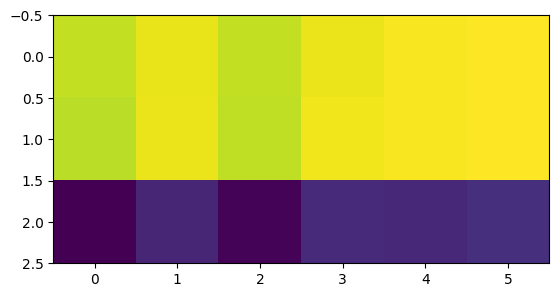

In [59]:
F_recon = torch.cat([kr_prod(component1, component2), kr_prod(component3, ratio32.unsqueeze(1))], dim=1)
F_recon = F_recon * sec1[:,0][:,None]

plt.imshow(F_recon.abs())

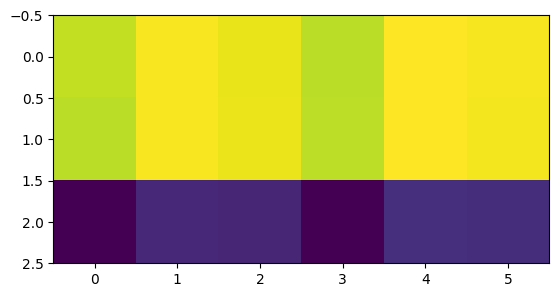

In [42]:
plt.imshow(F.abs())

In [57]:
idd

[1]

In [50]:
sec1.abs()

tensor([[0.1072, 0.1077],
        [0.1072, 0.1078],
        [0.0999, 0.1008]])

In [37]:
all_cfgs["weight_decay"].unique()

array(['1e-05', '5e-05', '0.0001', '0.0002', '0.0005'], dtype=object)

In [751]:
cfg = common_utils.MultiRunUtil.load_cfg("/checkpoint/yuandong/outputs/2024-09-11/15-04-12/90/")
cfg = { entry.split("=")[0] : entry.split("=")[1] for entry in cfg }
print(cfg)

{'activation': 'sqr', 'loss_func': 'mse', 'num_epochs': '5000', 'weight_decay': '5e-05', 'hidden_size': '1024', 'learning_rate': '0.01', 'M': '23', 'test_size': '0.1', 'save_interval': '100', 'seed': '1', '+run_name': '09-11_15-04', '+githash': '03d3981', '+sweep_filename': '/checkpoint/yuandong/sweeps/_private_home_yuandong_luckmatters_ssl_real-dataset/2024-09-11_15-04-09.log'}


In [ ]:
# loading all the saved results
root = "/checkpoint/yuandong/outputs/2024-09-12/16-56-18/"
folders = [ folder for folder in glob.glob(os.path.join(root, "*")) if os.path.isdir(folder) ]

all_data = [ torch.load(os.path.join(folder, "data.pth"), map_location="cpu") for folder in folders ]    

In [32]:
# root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/30/"

# M = 23 but with 1024 hidden size and 5e-5 weight decay
root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/90/"

# M = 23 but with 256 hidden size and 5e-5 weight decay
# root = "/checkpoint/yuandong/outputs/2024-09-11/15-04-12/60/"

root = "/checkpoint/yuandong/outputs/2024-09-12/16-56-18/19"
root = "/checkpoint/yuandong/outputs/2024-09-12/16-56-18/78"
root = "/checkpoint/yuandong/outputs/2024-09-12/16-56-18/139"

cfg = common_utils.MultiRunUtil.load_cfg(root)
cfg = { entry.split("=")[0] : entry.split("=")[1] for entry in cfg }
print(cfg)

As, Bs, Cs, ts, final_results = load_model_traj(root)
d = As.shape[0]

import pandas as pd

df = pd.DataFrame(final_results)

{'activation': 'sqr', 'loss_func': 'mse', 'num_epochs': '10000', 'weight_decay': '0.0001', 'hidden_size': '512', 'learning_rate': '0.01', 'M': '23', 'test_size': '0.1', 'save_interval': '100', 'seed': '5', '+run_name': '09-12_16-56', '+githash': 'ba2de90', '+sweep_filename': '/checkpoint/yuandong/sweeps/_private_home_yuandong_luckmatters_ssl_real-dataset/2024-09-12_16-56-14.log'}


In [33]:
# test_train_diff = df["test_acc"] - df["train_acc"]
# grok_index = test_train_diff.argmin()

test_train_diff = df["test_acc"] - df["train_acc"]
grok_index = test_train_diff.argmin()

print(grok_index, ts[grok_index])

(df["test_acc"] >= 0.99 & df["train_acc"] >= 0.99).nonzero()


print(grok_index, ts[grok_index])

17 17


TypeError: Cannot perform 'rand_' with a dtyped [float64] array and scalar of type [bool]

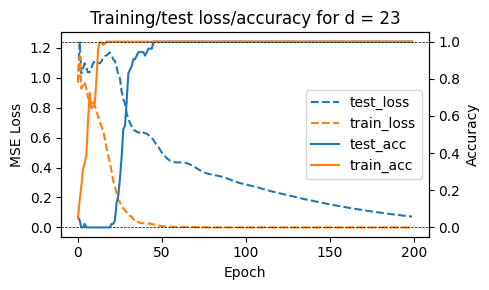

In [34]:
first_t = 200
grok_line = False

#plt.figure(figsize=(4,2))

fig, ax1 = plt.subplots(figsize=(5,3))

h1, = ax1.plot(df["epoch"][:first_t], df["test_loss"][:first_t], "--", label="test_loss")
h2, = ax1.plot(df["epoch"][:first_t], df["train_loss"][:first_t], "--", label="train_loss")
ax1.axhline(0, color='k', linestyle='--', linewidth=0.5)
ax1.set_xlabel("Epoch")
ax1.set_ylabel("MSE Loss")

ax2 = ax1.twinx()
h3, = ax2.plot(df["epoch"][:first_t], df["test_acc"][:first_t], label="test_acc")
h4, = ax2.plot(df["epoch"][:first_t], df["train_acc"][:first_t], label="train_acc")
ax2.axhline(1.0, color='k', linestyle='--', linewidth=0.5)
ax2.set_ylabel("Accuracy")

if grok_line:
    ax2.axvline(ts[grok_index], linestyle='-.', linewidth=1, color='m')

plt.legend(handles=[h1,h2,h3,h4], loc="center right")
plt.title(f"Training/test loss/accuracy for d = {d}")
plt.tight_layout()
plt.savefig(f"m{d}-training.pdf")
# plt.show()

tensor([0, 4, 6, 4, 6, 6, 6, 6, 4, 4, 6, 4])


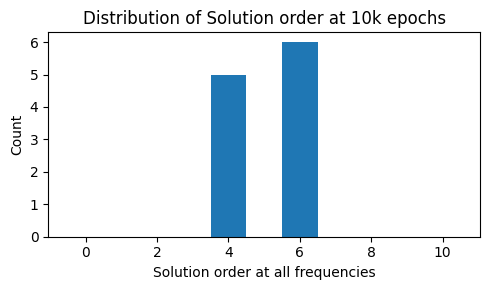

In [35]:
freq_patterns = (As[:(d-1)//2+1,:,-1].abs() > 0.05).sum(dim=1)
print(freq_patterns)

plt.figure(figsize=(5,3))

import numpy as np
bin_edges = np.linspace(-0.5, 10.5, 12)
plt.hist(freq_patterns[1:], bins=bin_edges)
plt.xlabel("Solution order at all frequencies")
plt.ylabel("Count")
plt.title(f"Distribution of Solution order at 10k epochs")
plt.tight_layout()
plt.savefig(f"m{d}-order-distri.pdf")

In [36]:
def compute_mps(As, Bs, Cs):
    # Compute r_{k1k2k}
    rkkks = torch.einsum('kjt,ljt,njt->klnt', As, Bs, Cs)
    
    d = As.shape[0]

    indices = list(range(d))
    ramkks = []
    rbmkks = []
    # Compute rotation.
    for m in range(d):
        ramkks.append(torch.einsum('kjt,njt->knt', As * As[indices,:,:].conj(), Cs))
        rbmkks.append(torch.einsum('kjt,njt->knt', Bs * Bs[indices,:,:].conj(), Cs))
        indices = indices[1:] + [indices[0]]


    # Compute r_pmk'k
    ramkks = torch.stack(ramkks, dim=0)
    rbmkks = torch.stack(rbmkks, dim=0)
    
    return dict(rkkks=rkkks, ramkks=ramkks, rbmkks=rbmkks)

In [185]:
rkkks.shape

torch.Size([23, 23, 23, 100])

In [49]:
data = compute_mps(As, Bs, Cs)
# multiple things by 2d to make sure it fits to our setup
rkkks = data["rkkks"] * 2 * d
ramkks = data["ramkks"] * 2 * d
rbmkks = data["rbmkks"] * 2 * d

first_t = 205

diag_dyn = 0
for i in range(d):
    diag_dyn += rkkks[i,i,i,:first_t].real
    
# diag_dyn /= d
    
off_diag_dyn = 0
for i1 in range(d):
    for i2 in range(d):
        for i3 in range(d):
            if i1 == i2 == i3:
                continue
            off_diag_dyn += rkkks[i1,i2,i3,:first_t].real
# off_diag_dyn /= (d**3 - d)

Diag_dyn
tensor(31)
tensor(22.3626)

Off_Diag_dyn
tensor(36)
tensor(2.5526)
tensor(23)
tensor(-1.0593)


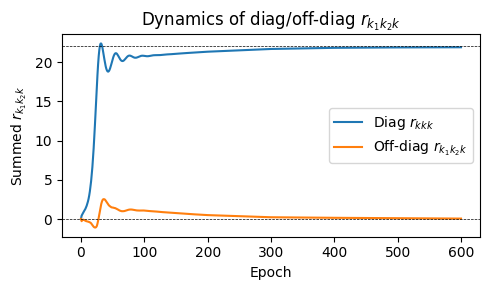

In [51]:
plt.figure(figsize=(5,3))

plt.plot(ts[:first_t], diag_dyn, label="Diag $r_{kkk}$")
plt.plot(ts[:first_t], off_diag_dyn, label = "Off-diag $r_{k_1k_2k}$")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.axhline(d - 1, color='k', linestyle='--', linewidth=0.5)

print("Diag_dyn")
print(diag_dyn.argmax())
print(diag_dyn.max())
print("")

print("Off_Diag_dyn")
print(off_diag_dyn.argmax())
print(off_diag_dyn.max())
print(off_diag_dyn.argmin())
print(off_diag_dyn.min())

if grok_line:
    plt.axvline(ts[grok_index], linestyle='-.', linewidth=1, color='m')

plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Summed $r_{k_1k_2k}$")
plt.title("Dynamics of diag/off-diag $r_{k_1k_2k}$")
plt.tight_layout()
plt.savefig(f"m{d}-dyn-r.pdf")
# plt.show()

In [409]:
off_diag_dyn[-1]

tensor(0.0074)

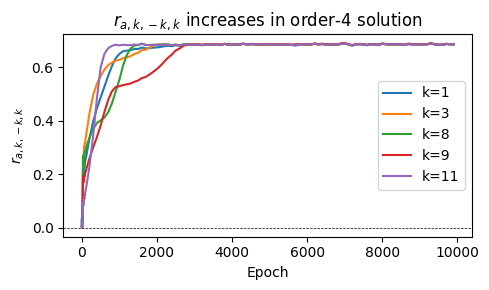

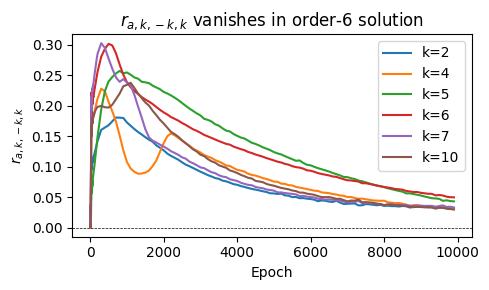

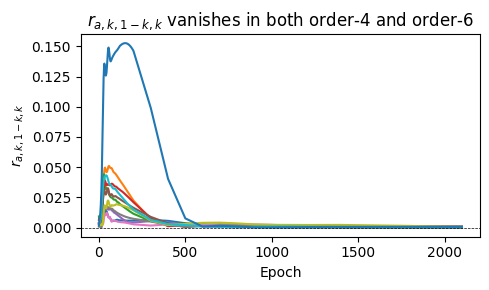

In [54]:
count_4 = (freq_patterns == 4).sum().item() // 2
count_6 = (freq_patterns == 6).sum().item() // 2

plt.figure(figsize=(5,3))
if grok_line:
    plt.axvline(ts[grok_index], linestyle='-.', linewidth=1, color='m')
for k in range(1, (d-1) // 2 + 1):
    if freq_patterns[k] == 4:
        # plt.plot(ts, rbmkks[0,:,k].sum(dim=0).abs(), label=f"k={k}")
        plt.plot(ts, ramkks[0,k,k].abs(), label=f"k={k}")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel("Epoch")
symbol = "$r_{a,k,-k,k}$"

plt.ylabel(symbol)
plt.title(f"{symbol} increases in order-4 solution")
plt.tight_layout()
plt.savefig(f"m{d}-dyn-order-4.pdf")

        # plt.subplot(2, count_4, cnt + count_4)
        # plt.plot(rbmkks[0,k,k].abs())
        # plt.title(f"freq {k}")
        
plt.figure(figsize=(5,3))
if grok_line:
    plt.axvline(ts[grok_index], linestyle='-.', linewidth=1, color='m')
for k in range(1, (d-1) // 2 + 1):
    if freq_patterns[k] == 6:
        plt.plot(ts, ramkks[0,k,k].abs(), label=f"k={k}")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel(symbol)
plt.title(f"{symbol} vanishes in order-6 solution")
plt.tight_layout()
plt.savefig(f"m{d}-dyn-order-6.pdf")
# plt.show()

        
        # plt.subplot(2, count_6, cnt + count_6)
        # plt.plot(rbmkks[0,k,k].abs())
        # plt.title(f"freq {k}")
first_t = 220
m = 1
symbol = "$r_{a,k," + str(m) + "-k,k}$"

plt.figure(figsize=(5,3))
if grok_line:
    plt.axvline(ts[grok_index], linestyle='-.', linewidth=1, color='m')
for k in range(1, (d-1) // 2 + 1):
    plt.plot(ts[:first_t], ramkks[m,k,k].abs()[:first_t], label=f"k={k}")
plt.axhline(0, color='k', linestyle='--', linewidth=0.5)
# plt.legend()
plt.xlabel("Epoch")
plt.ylabel(symbol)
plt.title(f"{symbol} vanishes in both order-4 and order-6")
plt.tight_layout()
plt.savefig(f"m{d}-dyn-a{m}kk.pdf")

In [525]:
df[:30]

,epoch,train_acc,test_acc,train_loss,test_loss
0,0,0.024857,0.000000,0.969803,0.990590
1,1,0.076482,0.000000,1.551560,1.824727
2,2,0.254302,0.000000,1.011474,1.082646
3,3,0.288719,0.000000,1.089371,1.108744
4,4,0.217973,0.000000,1.152154,1.248813
5,5,0.237094,0.000000,1.055547,1.244920
6,6,0.298279,0.000000,0.945519,1.194159
7,7,0.456979,0.000000,0.890314,1.161917
8,8,0.487572,0.000000,0.878917,1.148245
9,9,0.424474,0.000000,0.885370,1.138651


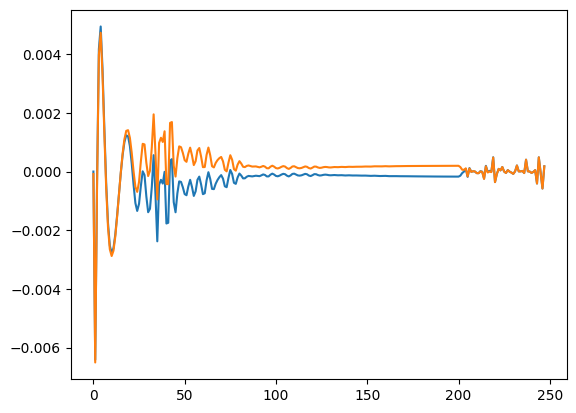

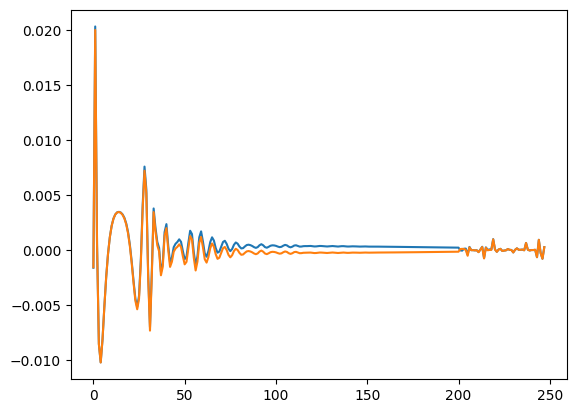

In [638]:
k = 1
plt.plot(ramkks[0,:,k].sum(dim=0).real)
plt.plot(rbmkks[0,:,k].sum(dim=0).real)
plt.show()

plt.plot(ramkks[0,:,k].sum(dim=0).imag)
plt.plot(rbmkks[0,:,k].sum(dim=0).imag)

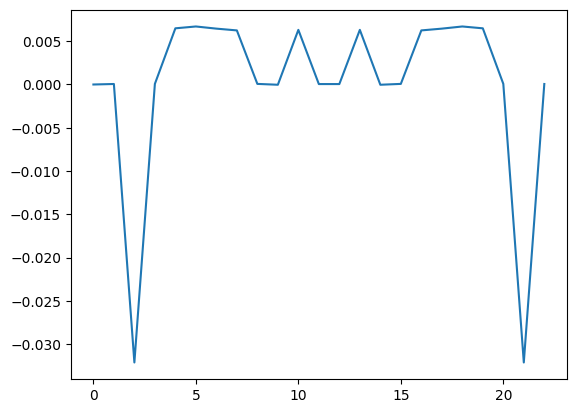

In [60]:
plt.plot(ramkks[0,:,2, -1].real)

In [85]:
As.shape

torch.Size([23, 512, 298])

In [160]:
sol = torch.tensor([[ 1.0000+5.2309e-10j,  0.5361-8.5910e-01j, -0.7447-6.5618e-01j],
        [ 1.0000+1.7495e-08j,  0.5050-8.8079e-01j, -0.1548-9.7861e-01j],
        [ 1.0000-1.2752e-08j, -0.4814+8.9743e-01j, -0.5242-8.3691e-01j]])

In [164]:
sol[2,:] * sol[0,:].conj()

tensor([ 1.0000-1.3275e-08j, -1.0291+6.7541e-02j,  0.9395+2.7928e-01j])

In [188]:
v = torch.tensor([[ 1.0000+0.0000j, -0.2849-0.9587j],
        [ 1.0000+0.0000j,  0.2847+0.9589j],
        [ 1.0000+0.0000j,  0.8382+0.5458j]])

In [193]:
v = torch.tensor([[ 1.0000+0.0000j, -0.4313+0.9062j],
        [ 1.0000+0.0000j,  0.4307-0.9052j],
        [ 1.0000+0.0000j,  0.6333-0.7805j]])

In [194]:
v.angle() / math.pi * 180

tensor([[  0.0000, 115.4518],
        [  0.0000, -64.5546],
        [  0.0000, -50.9440]])

In [195]:
v[0,1] * v[1,1] * v[2,1]

tensor(1.0112-0.0008j)

In [213]:
v = torch.tensor([-0.0985-0.0432j, -0.0746-0.0775j,  0.0350-0.0943j])

In [198]:
v.prod()

tensor(0.0012+2.7670e-06j)

In [205]:
1 / (v[0] * v[1] * v[2])

tensor(859.2724-2.0430j)

In [31]:
v = torch.tensor([-0.7826+0.6327j,  0.7817-0.6349j, -0.2097-0.9873j])
# v = torch.tensor([-0.5751-0.8270j,  0.5755+0.8255j,  0.3492+0.9499j])

In [32]:
v[0] * v[1] * v[2]

tensor(1.0229-0.0005j)

In [64]:
sec1[:,0].prod() * 2 * d * 6

tensor(0.9783-0.0011j)

In [65]:
V = torch.tensor([[ 1.0000+0.0000j, -0.8529+0.5215j],
        [ 1.0000+0.0000j,  0.4951-0.8686j],
        [ 1.0000+0.0000j, -0.0314-1.0003j]])

In [71]:
V[:,1].angle() / math.pi * 180

tensor([148.5566, -60.3170, -91.7980])

In [73]:
V[0,1] * V[1,1].conj()

tensor(-0.8752-0.4826j)

In [75]:
V = torch.tensor([[ 1.0000-8.8432e-09j, -0.7825-6.2058e-01j,  0.0293-9.9936e-01j],
        [ 1.0000-4.0902e-10j, -0.1489-9.8887e-01j,  0.8498-5.2458e-01j],
        [ 1.0000+2.4035e-09j, -0.4970-8.6647e-01j, -0.4999+8.6321e-01j]])

In [76]:
V

tensor([[ 1.0000-8.8432e-09j, -0.7825-6.2058e-01j,  0.0293-9.9936e-01j],
        [ 1.0000-4.0902e-10j, -0.1489-9.8887e-01j,  0.8498-5.2458e-01j],
        [ 1.0000+2.4035e-09j, -0.4970-8.6647e-01j, -0.4999+8.6321e-01j]])

In [90]:
V.angle() / math.pi * 180

tensor([[  0.0000, 137.4114],
        [  0.0000, -42.6132],
        [  0.0000, -94.8126]])

In [80]:
(V[0,:] * V[1,:] * V[2,:].conj()).sum()

tensor(-0.0002+0.0020j)

In [81]:
V[0,:] * V[1,:] * V[2,:].conj()

tensor([ 1.0000-1.1656e-08j, -0.5034-8.6127e-01j, -0.4967+8.6327e-01j])

In [83]:
V[0,2] * V[1,2]

tensor(-0.4993-0.8646j)

In [84]:
V = torch.tensor([[ 1.0000+0.0000j, -0.7362+0.6767j],
        [ 1.0000+0.0000j,  0.7360-0.6771j],
        [ 1.0000+0.0000j, -0.0839-0.9965j]])

In [85]:
V.abs()

tensor([[1.0000, 1.0000],
        [1.0000, 1.0001],
        [1.0000, 1.0000]])

In [86]:
V.prod(dim=0)

tensor([1.0000+0.0000j, 1.0001-0.0003j])

In [97]:
(V[1,:]*V[1,:]*V[2,:]).sum()

tensor(-0.0002+0.0007j)

In [11]:
V = torch.tensor([[ 1.0000+0.0000j, -0.2179+0.9760j],
        [ 1.0000+0.0000j,  0.2184-0.9758j],
        [ 1.0000+0.0000j,  0.9048-0.4256j]])

In [13]:
(V[1,:]*V[1,:]*V[2,:]).sum()

tensor(0.0002-0.0007j)

In [30]:
C = torch.zeros((3,1), dtype=torch.cfloat)

# C[0].real = math.cos(math.pi / 4)
# C[0].imag = math.sin(math.pi / 4)
# C[1] = C[0].conj() ** 3

# C[2] = C[0] ** 2

C[0] = 1
C[1].imag = 1
C[2].imag = -1

print(C)


check_constraint(C)

tensor([[1.+0.j],
        [0.+1.j],
        [0.-1.j]])
Rc
abc = (1+0j)
^abc = (1+0j)
a^bc = (-1+0j)
ab^c = (-1+0j)
Rn
a^ac = -1j
b^bc = -1j
R*
aac = -1j
bbc = 1j
^a^ac = -1j
^b^bc = 1j
